In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import seaborn as sns

%matplotlib inline

# Data Reading and Visualizations

In [2]:
X = pd.read_csv(r'../data/processed/X_priority.csv').iloc[:, 1:]
y = pd.read_csv(r'../data/processed/y_priority.csv').iloc[:, 1]

# Drop null values
X.dropna(how='all', inplace=True)
y = y.reindex_like(X)

In [3]:
print('Check that X and y have the same values after dropping NA values: {}'.format(len(X) == len(y)))

Check that X and y have the same values after dropping NA values: True


In [4]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65232 entries, 0 to 65661
Data columns (total 48 columns):
m10_cen_memi_x       60483 non-null float64
t10_cen_blk_ml       65232 non-null float64
t10_gis_area_k       65232 non-null float64
t10_ldb_a60up_c      65232 non-null float64
t10_ldb_a75up_c      65232 non-null float64
t10_ldb_ag25up_c     65232 non-null float64
t10_ldb_asian_p      65232 non-null float64
t10_ldb_col_p        65232 non-null float64
t10_ldb_fb_p         65232 non-null float64
t10_ldb_hh_c         65232 non-null float64
t10_ldb_hinci_m      65232 non-null float64
t10_ldb_hisp_p       65232 non-null float64
t10_ldb_hs_p         65232 non-null float64
t10_ldb_lep_p        65232 non-null float64
t10_ldb_mhmvali_m    65232 non-null float64
t10_ldb_mrenti_m     65232 non-null float64
t10_ldb_multi_p      65232 non-null float64
t10_ldb_nhblk_p      65232 non-null float64
t10_ldb_nhwht_p      65232 non-null float64
t10_ldb_npov_c       65232 non-null float64
t10_ldb_npo

**m10_cen_memi_x** is the only variable that has missing values.

In [5]:
X.describe()

,m10_cen_memi_x,t10_cen_blk_ml,t10_gis_area_k,t10_ldb_a60up_c,t10_ldb_a75up_c,t10_ldb_ag25up_c,t10_ldb_asian_p,t10_ldb_col_p,t10_ldb_fb_p,t10_ldb_hh_c,...,t10_net_hsr_c,t10_net_kct_c,t10_net_liq_c,t10_net_mul_c,t10_net_ngt_c,t10_net_pht_c,t10_net_res_c,t10_net_srv_c,t10_net_wal_c,t10_use_green_k
count,60483.000000,65232.000000,65232.000000,65232.000000,65232.000000,65232.000000,65232.000000,65232.000000,65232.000000,65232.000000,...,65232.000000,65232.000000,65232.000000,65232.000000,65232.000000,65232.000000,65232.000000,65232.000000,65232.000000,65232.000000
mean,1.101632,0.054964,110.210846,816.220337,264.251594,2881.464511,0.043259,0.269761,0.122891,1620.049117,...,0.597713,0.093126,0.634698,1.399402,1.197621,0.622146,0.946578,2.939404,82.854915,100.131983
std,0.302166,0.129193,564.415005,436.953493,183.576128,1259.530055,0.083240,0.180497,0.137796,697.086754,...,0.958337,1.204615,0.960206,1.700164,1.890396,1.108233,1.462344,3.843438,63.764504,539.802221
min,1.000000,0.001291,0.008299,9.000000,0.000000,247.000000,0.000000,0.000000,0.000000,22.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.015574,1.914044,507.000000,139.000000,1987.000000,0.001338,0.132653,0.023548,1124.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.800000,42.800000,0.017100
50%,1.000000,0.022777,5.213225,744.000000,225.000000,2720.000000,0.012913,0.218988,0.068957,1529.000000,...,0.000000,0.000000,0.000000,1.000000,0.800000,0.000000,0.400000,1.800000,67.000000,1.039203
75%,1.000000,0.038714,37.720683,1040.000000,344.000000,3582.000000,0.046191,0.369536,0.173442,2011.000000,...,1.000000,0.000000,1.000000,2.000000,1.800000,1.000000,1.400000,3.800000,103.400000,27.865246
max,2.000000,3.978858,24676.908121,9614.000000,3014.000000,21414.000000,0.920511,0.946194,0.867325,11696.000000,...,48.000000,293.600000,25.600000,41.600000,111.000000,21.600000,76.800000,114.800000,1634.400000,24315.575822


In [6]:
X.shape

(65232, 48)

## Visualizations

### Target

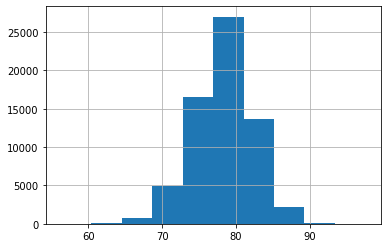

In [7]:
y.hist();

Our target actually looks pretty close to normally distributed which will likely be helpful for linear methods

### Continuous Features 

In [8]:
bin_features = "m10_cen_memi_x"
cont_features = [x for x in X.columns.tolist() if x !=bin_features]

#### Distributions

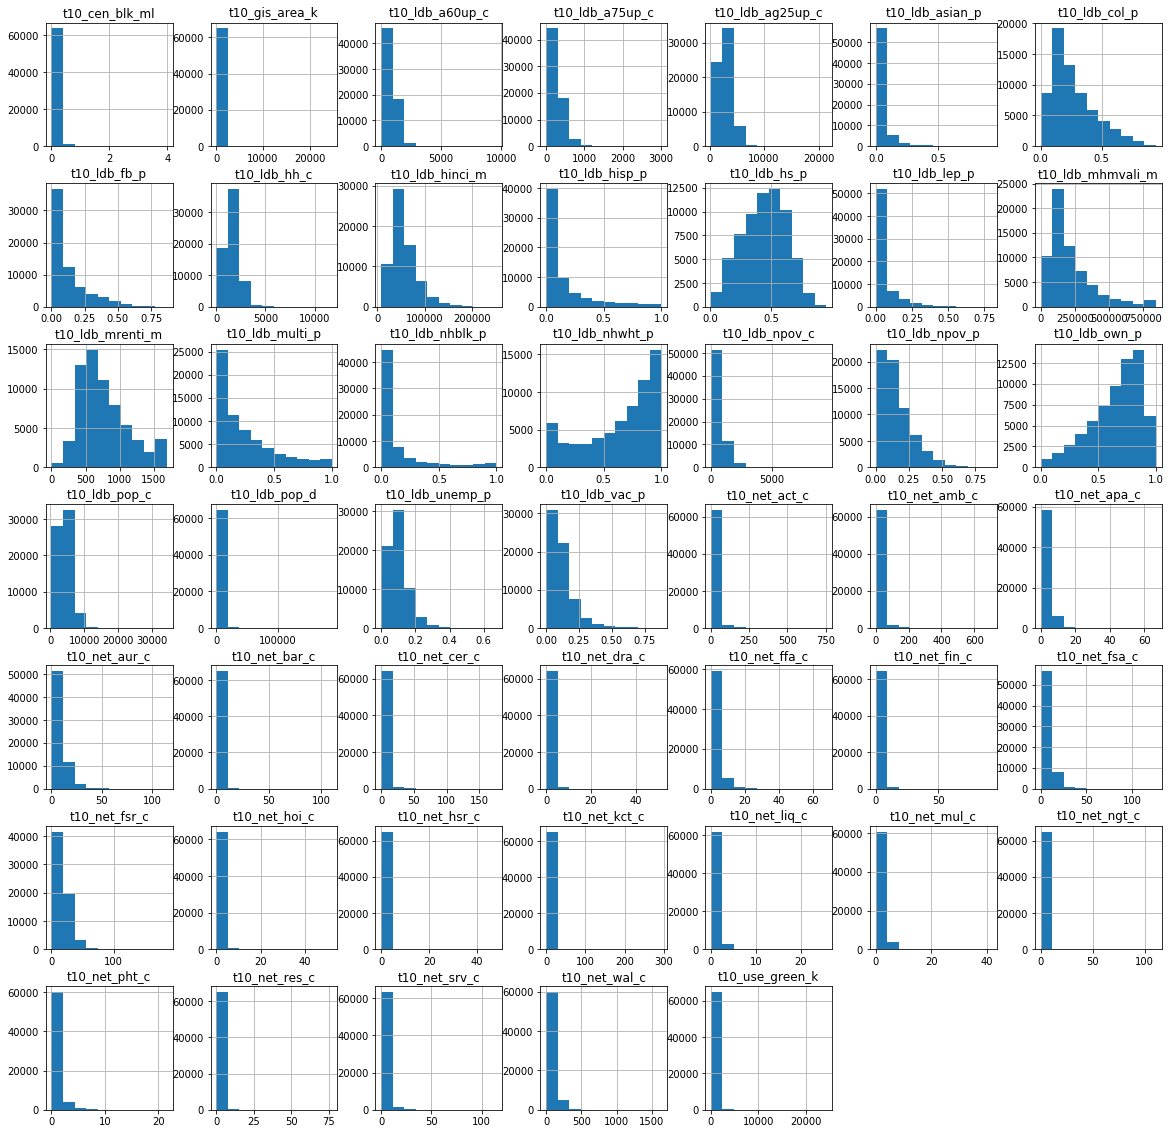

In [9]:
X[cont_features].hist(figsize=(20,20));

A lot of these distributions have very strong left skew, and look vaguely exponential. A few of them look like they may be normal. NETS variables are the most strikingly right skewed, with the vast majority of tracts having a very small number of each kind of business.  

The LTDB variables are not quit as striking, and seem to have a lot more tract-level variety. 

### Categorical Feature(s) \[Needs filling in\]

The only non-binary feature is m10_cen_memi_x.

### Feature-wise Plots vs Target

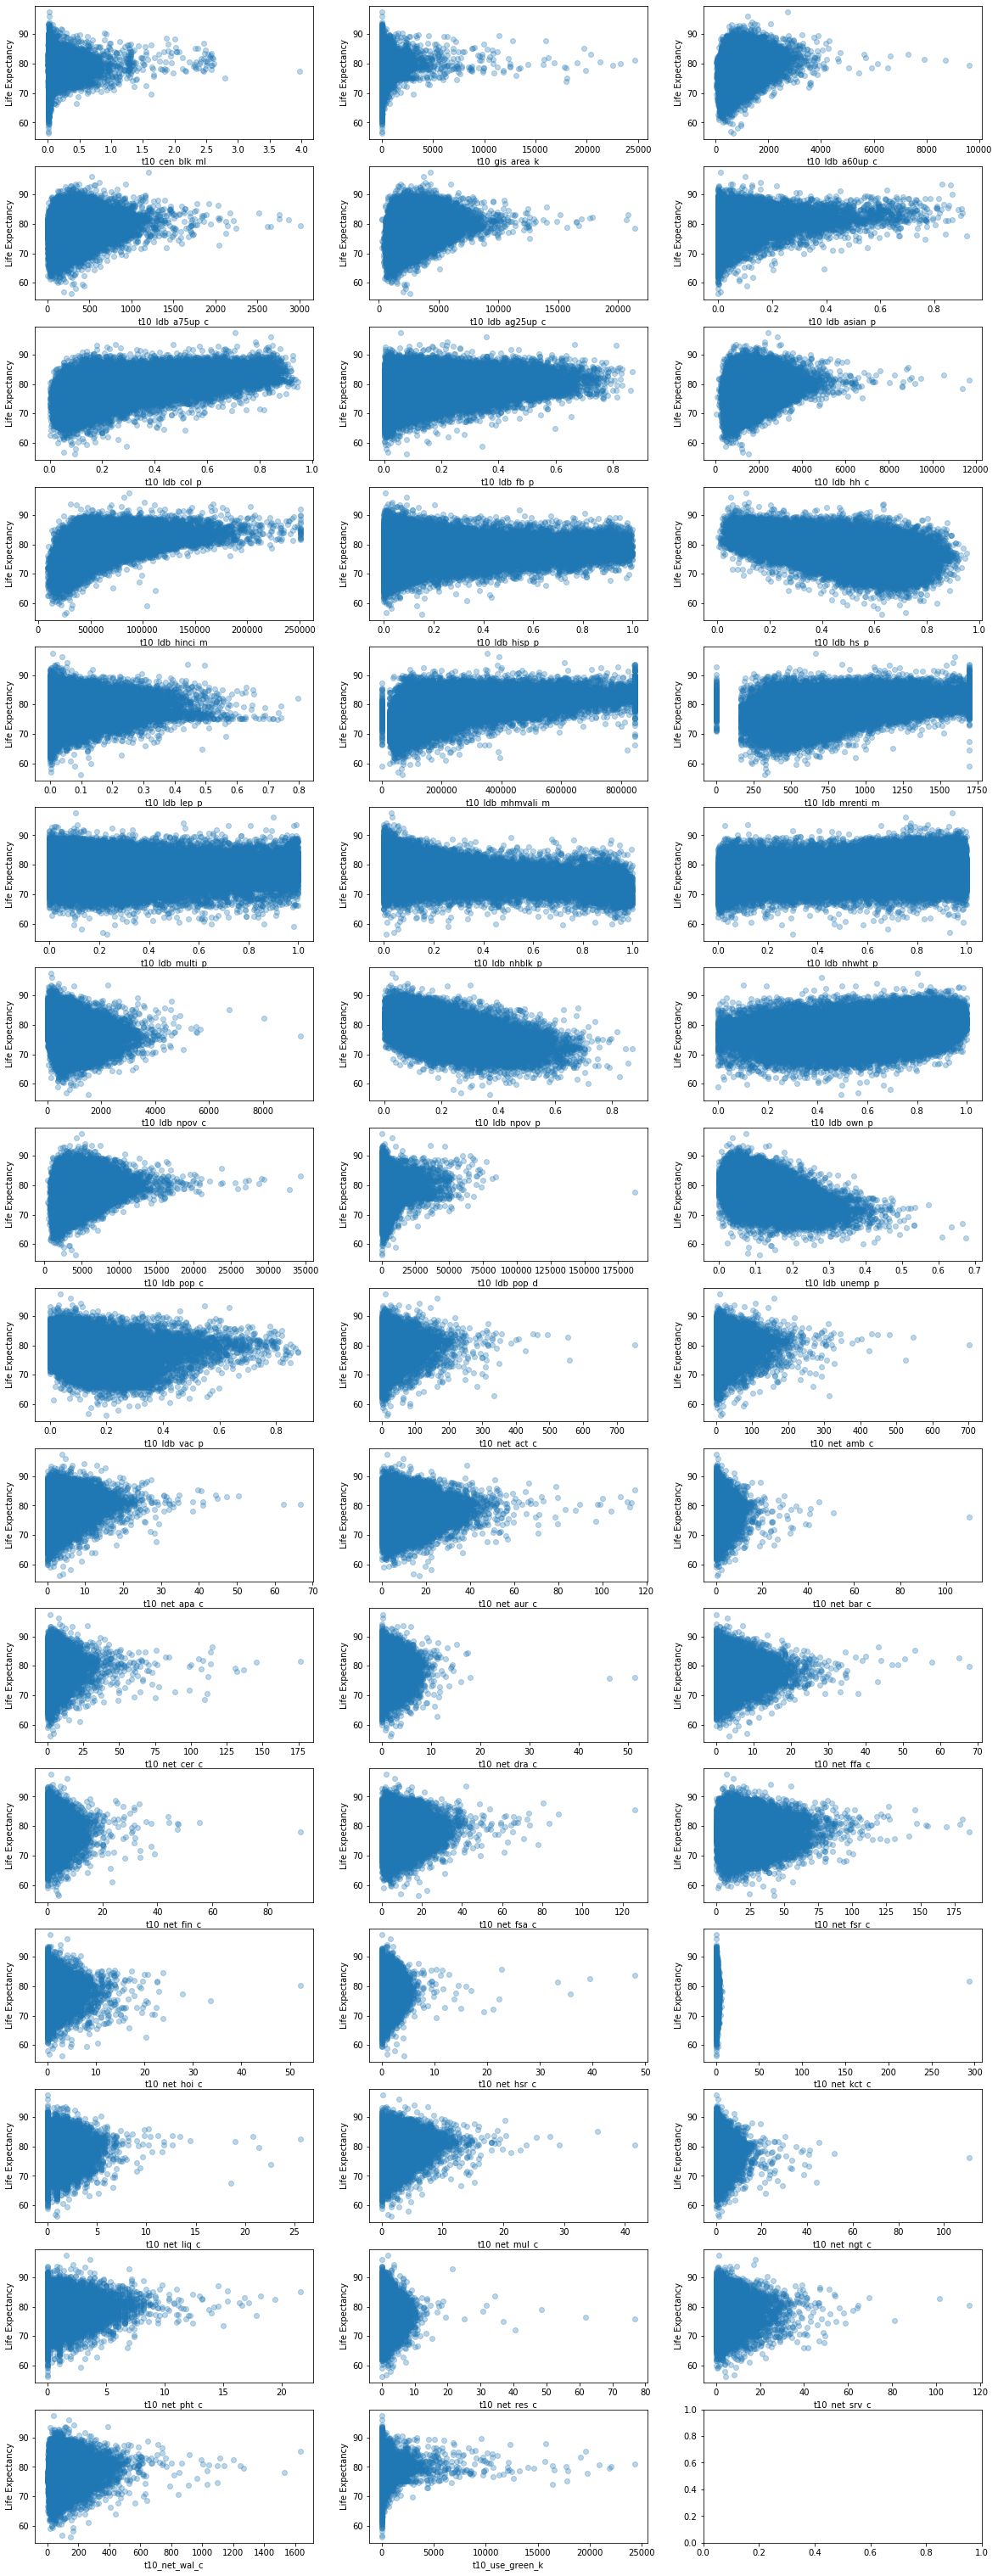

In [10]:
nrows=16
ncols=3
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20,55))
k = 0
for i in range(nrows):
    for j in range(ncols):
        try:
            feature = X[cont_features].iloc[:, k]
            axes[i, j].set(xlabel=feature.name,
                          ylabel="Life Expectancy")
            axes[i, j].scatter(x=feature, y=y, alpha=0.3)
            k += 1
        except IndexError:
            break

Many of these plots, **especially** the NETS ones, show heteroskedacicity.  We're not super concerened with p-values and confidence intervals so it may not be the biggest deal but it is definitely something to note.

### Collinearities

We're expecting a lot of collinearity, especially within LTDB and census varuables. I attempted a pairplot, but there were too many variables for this to be useful.

# Linear Models

In [11]:
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from scipy.cluster import hierarchy
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV

## Split Data

In [12]:
# Split data into 
X_train, X_test, y_train, y_test = train_test_split(X[cont_features], y, random_state=0)

## Single Variables

In [13]:
results = {}
for col in cont_features:
    lr = LinearRegression()
    score = cross_val_score(lr, X_train[col].values.reshape(-1,1), y_train, cv=5)
    results[col] = np.mean(score)

results_df = pd.Series(results).sort_values(ascending=False)

In [14]:
results_df

t10_ldb_hinci_m      0.362840
t10_ldb_col_p        0.336762
t10_ldb_npov_p       0.325817
t10_ldb_hs_p         0.309878
t10_ldb_mhmvali_m    0.300135
t10_ldb_mrenti_m     0.236063
t10_ldb_unemp_p      0.213557
t10_ldb_nhblk_p      0.190386
t10_ldb_npov_c       0.128270
t10_ldb_own_p        0.087851
t10_ldb_asian_p      0.086847
t10_ldb_vac_p        0.069896
t10_net_apa_c        0.063157
t10_ldb_ag25up_c     0.062478
t10_ldb_fb_p         0.056627
t10_ldb_nhwht_p      0.053784
t10_ldb_a60up_c      0.053645
t10_net_mul_c        0.040672
t10_ldb_pop_c        0.037489
t10_ldb_hh_c         0.036610
t10_ldb_a75up_c      0.029752
t10_net_amb_c        0.019063
t10_net_pht_c        0.018935
t10_net_act_c        0.017266
t10_net_cer_c        0.011514
t10_net_wal_c        0.006787
t10_ldb_pop_d        0.005284
t10_net_res_c        0.002392
t10_net_ngt_c        0.002323
t10_ldb_lep_p        0.002288
t10_ldb_multi_p      0.002288
t10_net_bar_c        0.002092
t10_net_fsr_c        0.002007
t10_cen_bl

We have some pretty good univariate predictors.  As expected, all of the top performers are LTDB variables.  The following LTDB variables all produce an R<sup>2</sup> of > 0.3:
* **hinci_m**: Median household income
* **col_p**: Percent of persons with at least a 4-year college degree
* **npov_p**: Percent of persons in poverty
* **hs_p**: Percent of persons with a high school degree or less
* **mhmvali_m**: Medidan home value (inflation-adjusted)

I suspect that many of these variables will be highly correlated, so I'll look at a covariance matrix.

In [15]:
high_r_cols = results_df[results_df > .3].index

In [16]:
X_train[high_r_cols].corr()

,t10_ldb_hinci_m,t10_ldb_col_p,t10_ldb_npov_p,t10_ldb_hs_p,t10_ldb_mhmvali_m
t10_ldb_hinci_m,1.000000,0.753253,-0.695272,-0.714248,0.681087
t10_ldb_col_p,0.753253,1.000000,-0.524290,-0.906527,0.667029
t10_ldb_npov_p,-0.695272,-0.524290,1.000000,0.600343,-0.378111
t10_ldb_hs_p,-0.714248,-0.906527,0.600343,1.000000,-0.563265
t10_ldb_mhmvali_m,0.681087,0.667029,-0.378111,-0.563265,1.000000


In [17]:
corr_unsorted = X_train[high_r_cols].corr().values
order = np.array(hierarchy.dendrogram(hierarchy.ward(corr_unsorted), no_plot=True)['ivl'], dtype="int")
corr = corr_unsorted[order, :][:, order]

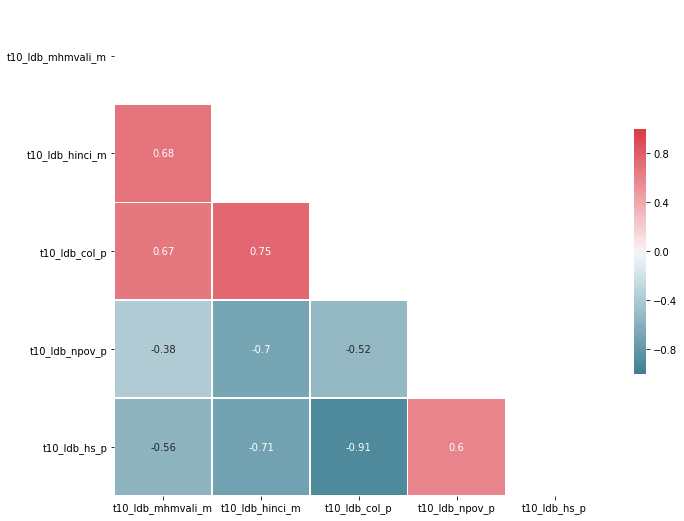

In [18]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True,
           xticklabels=high_r_cols[order],
           yticklabels=high_r_cols[order])

We do see some pretty high correlations, but not as high as I was expecting in most cases. The highest is a negative correlation between the  number of percent of people with at least a college degree and the percent of people with at most a high school degree, which are obviously in direct opposition.  There's also a pretty strong positive correlation between college degrees and median household income, which once again isn't surprising and I imagine most of these things are pretty well studied already.  

## Baseline Model

We'll create a baseline model using Ridge regression, LASSO regression, and ElasticNet. The baseline model will include all variables except NETS variables. We'll try both StandardScaler and RobustScaler (which uses the median and quartiles to reduce the influence of outliers on scaling). Due to the high correlation between variables, we won't use standard Ordinary Least Squares Regression as we won't be able to trust the coefficients, which is our initial method of identifying variable importance.

In [19]:
base_features = [x for x in cont_features if 'net' not in x]

### LASSO

Lasso regression performs L1 regularization, which adds a penalty equal to the absolute value of the magnitude of coefficients. This type of regularization can result in sparse models with few coefficients; Some coefficients can become zero and eliminated from the model. Larger penalties result in coefficient values closer to zero, which is the ideal for producing simpler models.

![alt text](https://qph.fs.quoracdn.net/main-qimg-2a88e2acc009fa4de3edeb51e683ca02.webp)

As shown in the image, the nature of the l1 norm function and its use of the absolute value drives coefficients directly to 0, while l2 norm used for ridge regression just drives them *close* to 0.  

I'll be using the LassoCV function which automatically gridsearches for the optimum $\alpha$ parameter on a log scale.

In [20]:
lasso_standard = make_pipeline(StandardScaler(), LassoCV(cv=5))

lasso_standard_score = lasso_standard.fit(X_train, y_train)